In [1]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the trained classifier
clf = joblib.load("model/ai_ws_classifier.joblib")
scaler = joblib.load("model/scaler_ws.joblib")

In [3]:
# Automatically load all labeled ws_capture CSVs
csv_files = glob.glob("data-ws/ws_capture_*_labeled_*.csv")
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
print(f"Loaded {len(df)} flows from {len(csv_files)} files.")

Loaded 1219 flows from 532 files.


/var/folders/36/9897zdqx7851xfw34z3vf8s00000gr/T/ipykernel_82649/2943314244.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)


In [4]:
# Select relevant features
features = ["duration", "c_to_s_pkts", "s_to_c_pkts", "c_to_s_bytes", "s_to_c_bytes"]
X = df[features]

In [5]:
X_scaled = pd.DataFrame(scaler.transform(X), columns=features)

In [6]:
# Predict labels
df["predicted_label"] = clf.predict(X_scaled)

In [7]:
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # Convert to numeric
df["predicted_label"] = pd.to_numeric(df["predicted_label"], errors="coerce")
df = df.dropna(subset=["label", "predicted_label"])  # Drop bad rows
df["label"] = df["label"].astype(int)
df["predicted_label"] = df["predicted_label"].astype(int)

In [8]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       384
           1       1.00      0.99      0.99       835

    accuracy                           0.99      1219
   macro avg       0.99      0.99      0.99      1219
weighted avg       0.99      0.99      0.99      1219



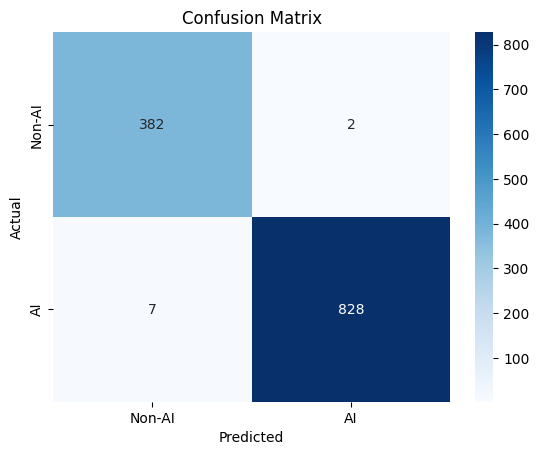

In [9]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('figure/confusion_matrix_rf_ws.png')
plt.show()

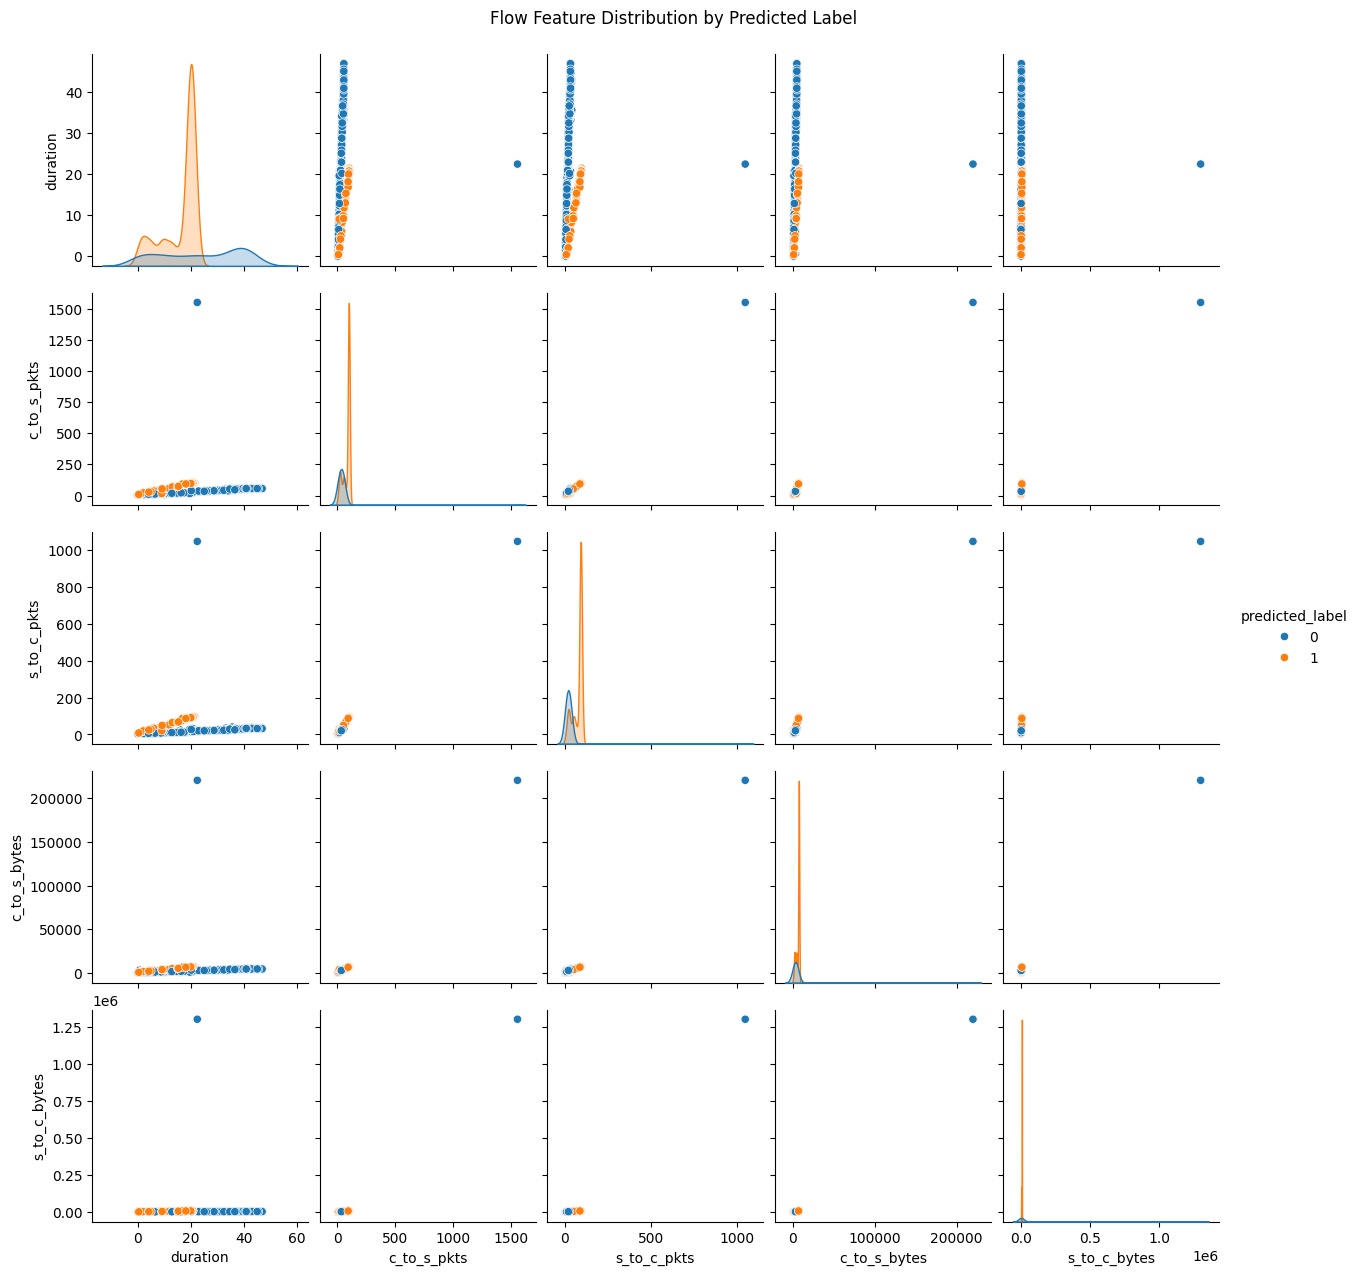

In [10]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('figure/pairplot_rf_ws.png')
plt.show()

In [11]:
# Load the trained classifier
clf = joblib.load("model/ai_ws_classifier_logistic.joblib")

In [12]:
# Predict labels
df["predicted_label"] = clf.predict(X_scaled)

In [13]:
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # Convert to numeric
df["predicted_label"] = pd.to_numeric(df["predicted_label"], errors="coerce")
df = df.dropna(subset=["label", "predicted_label"])  # Drop bad rows
df["label"] = df["label"].astype(int)
df["predicted_label"] = df["predicted_label"].astype(int)

In [14]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68       384
           1       0.82      1.00      0.90       835

    accuracy                           0.85      1219
   macro avg       0.91      0.76      0.79      1219
weighted avg       0.88      0.85      0.83      1219



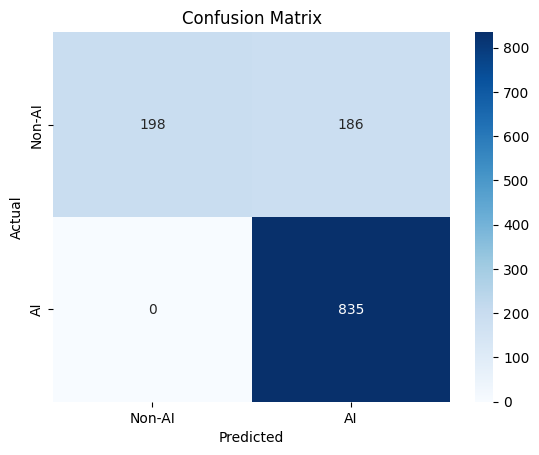

In [15]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('figure/confusion_matrix_lr_ws.png')
plt.show()

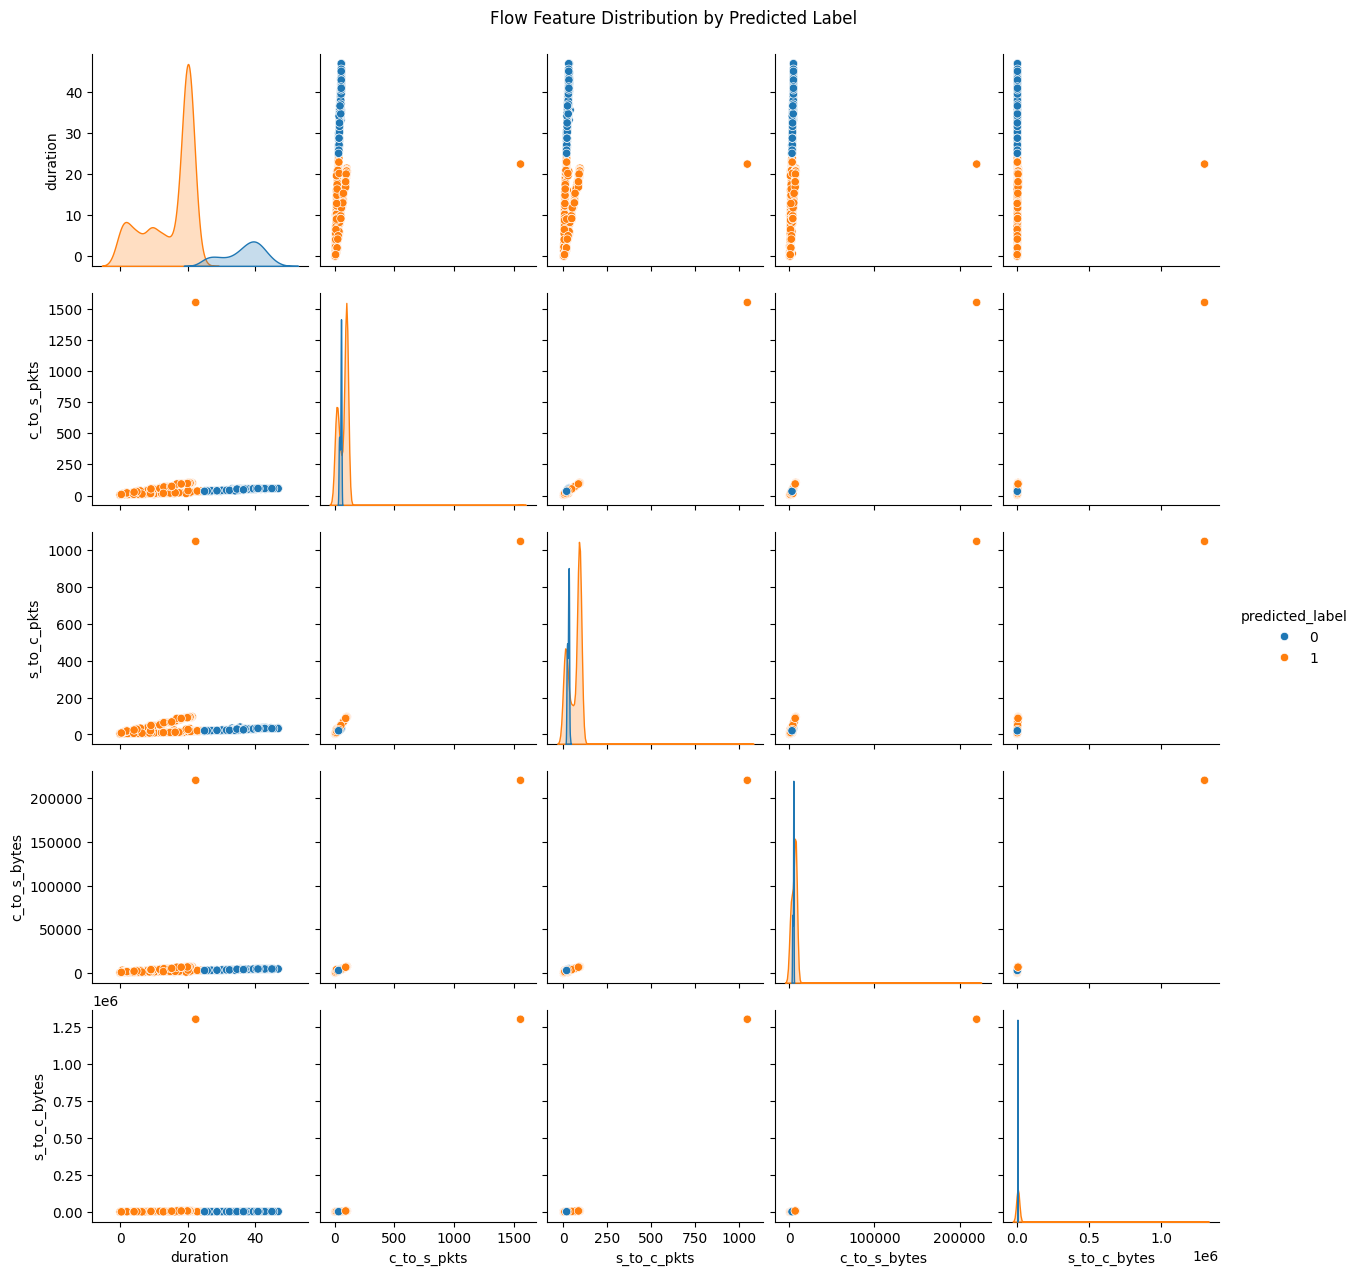

In [16]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('figure/pairplot_lr_ws.png')
plt.show()

In [17]:
# Load the trained classifier
clf = joblib.load("model/ai_wss_classifier.joblib")
scaler = joblib.load("model/scaler_wss.joblib")

In [18]:
# Automatically load all labeled ws_capture CSVs
csv_files = glob.glob("data-wss/wss_capture_*_labeled_*.csv")
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
print(f"Loaded {len(df)} flows from {len(csv_files)} files.")

/var/folders/36/9897zdqx7851xfw34z3vf8s00000gr/T/ipykernel_82649/874824174.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)


Loaded 3966 flows from 1919 files.


In [19]:
# Select relevant features
features = ["duration", "c_to_s_pkts", "s_to_c_pkts", "c_to_s_bytes", "s_to_c_bytes"]
X = df[features]

In [20]:
X_scaled = pd.DataFrame(scaler.transform(X), columns=features)

In [21]:
# Predict labels
df["predicted_label"] = clf.predict(X_scaled)

In [22]:
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # Convert to numeric
df["predicted_label"] = pd.to_numeric(df["predicted_label"], errors="coerce")
df = df.dropna(subset=["label", "predicted_label"])  # Drop bad rows
df["label"] = df["label"].astype(int)
df["predicted_label"] = df["predicted_label"].astype(int)

In [23]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1657
           1       0.99      0.98      0.99      2309

    accuracy                           0.99      3966
   macro avg       0.99      0.99      0.99      3966
weighted avg       0.99      0.99      0.99      3966



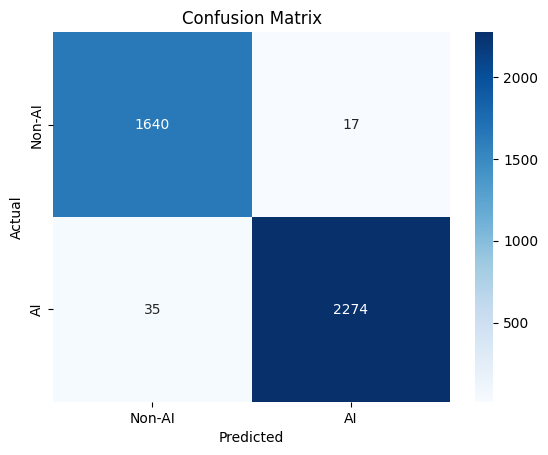

In [24]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('figure/confusion_matrix_rf_wss.png')
plt.show()

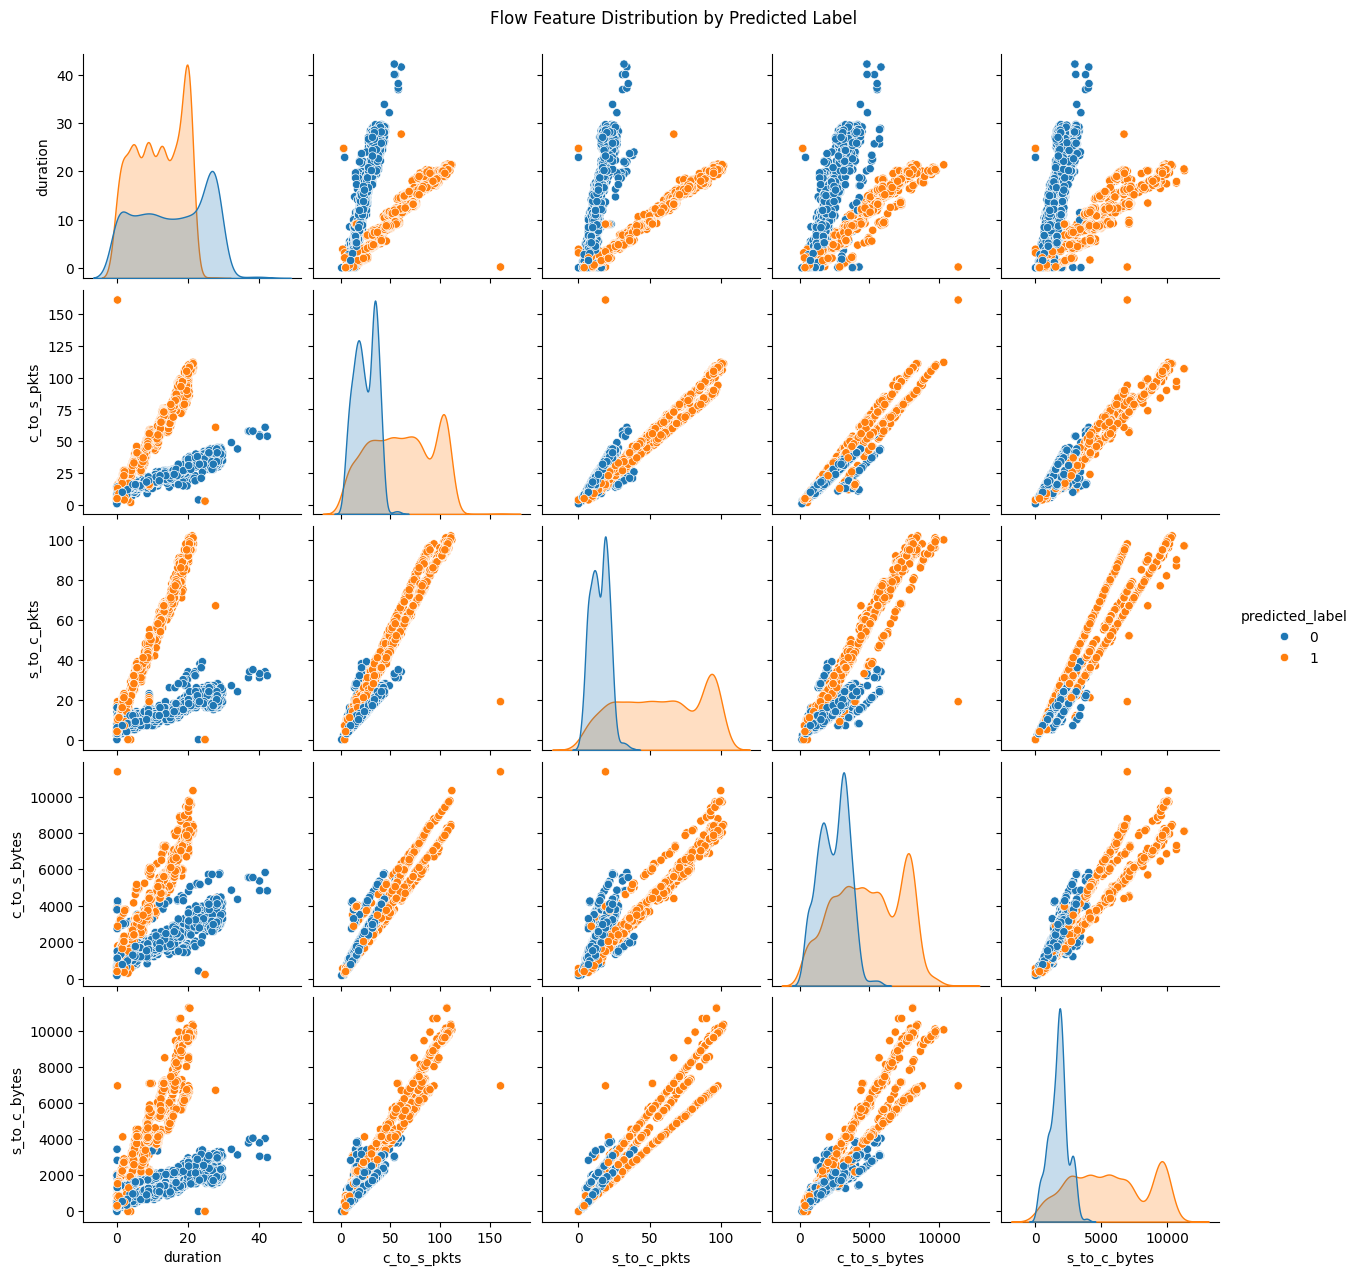

In [25]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('figure/pairplot_rf_wss.png')
plt.show()

In [26]:
# Load the trained classifier
clf = joblib.load("model/ai_wss_classifier_logistic.joblib")

In [27]:
# Predict labels
df["predicted_label"] = clf.predict(X_scaled)

In [28]:
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # Convert to numeric
df["predicted_label"] = pd.to_numeric(df["predicted_label"], errors="coerce")
df = df.dropna(subset=["label", "predicted_label"])  # Drop bad rows
df["label"] = df["label"].astype(int)
df["predicted_label"] = df["predicted_label"].astype(int)

In [29]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1657
           1       0.99      0.94      0.96      2309

    accuracy                           0.96      3966
   macro avg       0.96      0.96      0.96      3966
weighted avg       0.96      0.96      0.96      3966



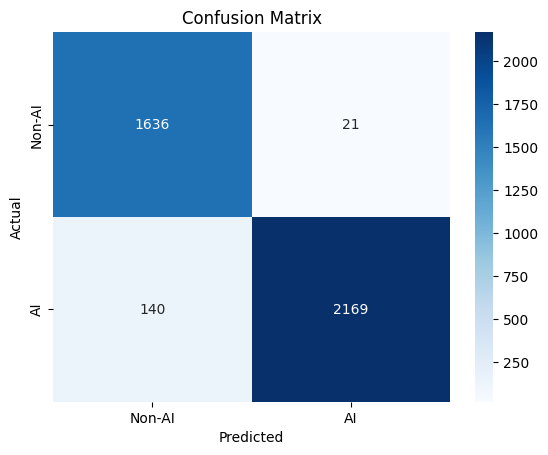

In [30]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('figure/confusion_matrix_lr_wss.png')
plt.show()

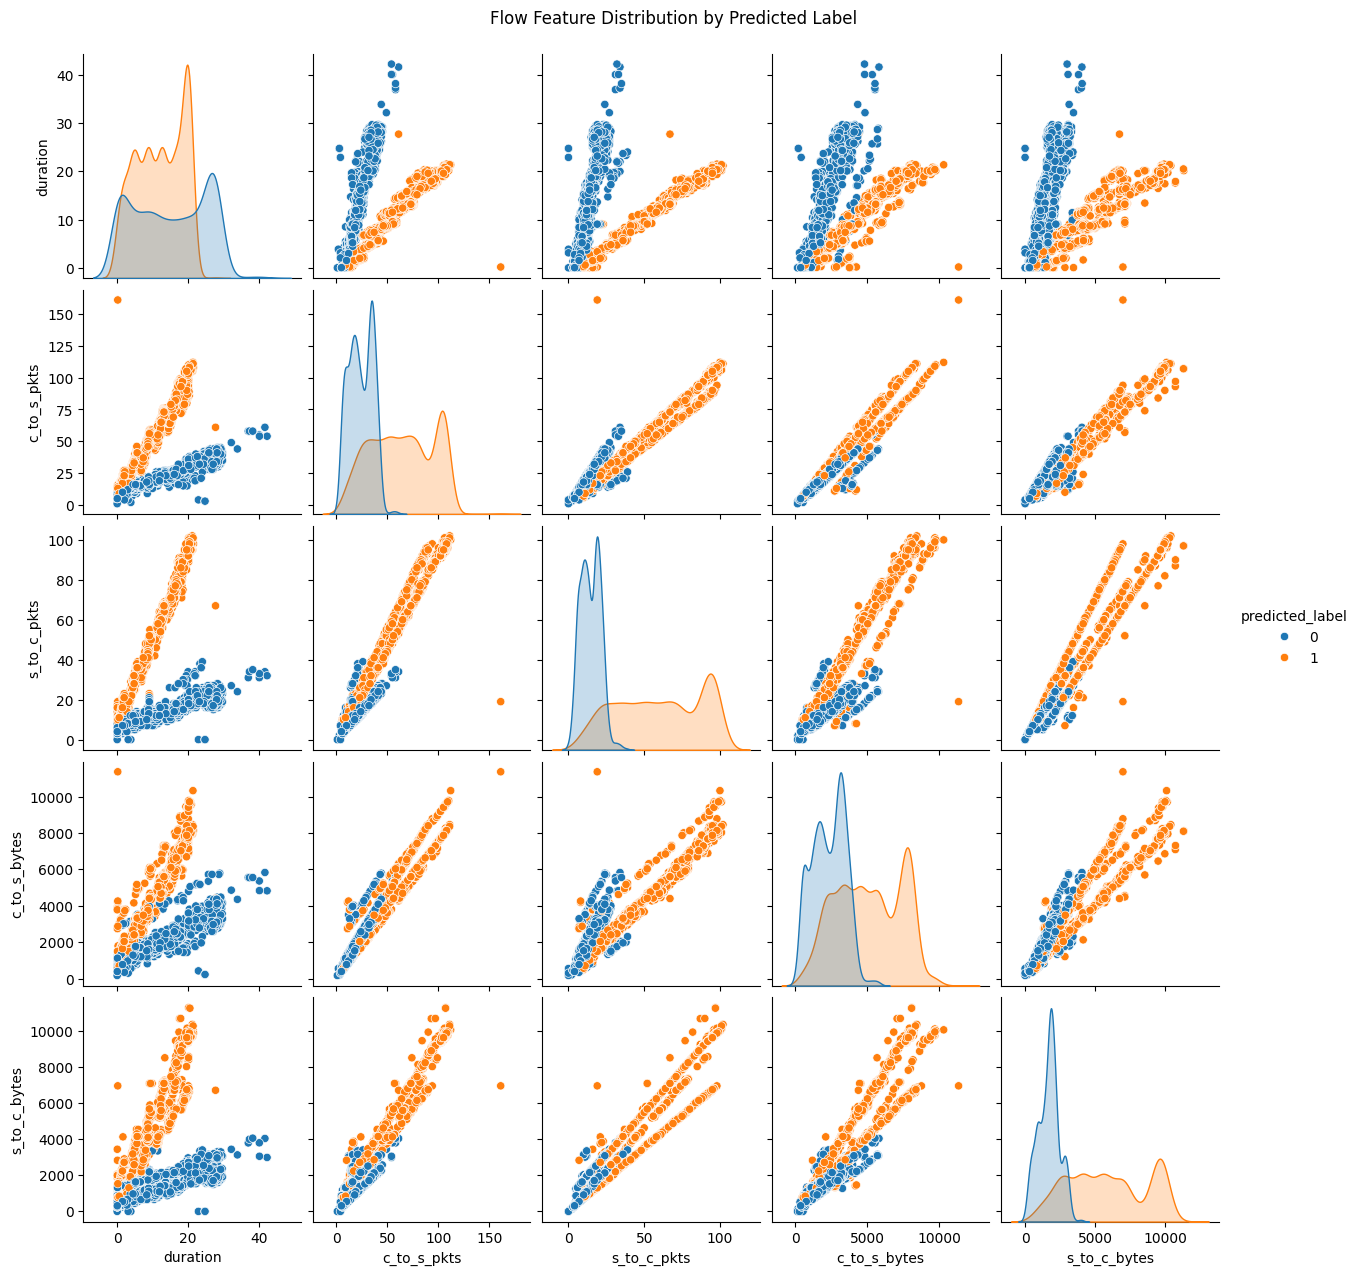

In [158]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('figure/pairplot_lr_wss.png')
plt.show()

In [ ]:
# Load the trained classifier
clf = joblib.load("model/ai_mcp_classifier.joblib")
scaler = joblib.load("model/scaler_mcp.joblib")

In [ ]:
# Automatically load all labeled ws_capture CSVs
csv_files = glob.glob("data-mcp/mcp_capture_*_labeled_*.csv")
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
print(f"Loaded {len(df)} flows from {len(csv_files)} files.")

In [ ]:
# Select relevant features
features = ["duration", "c_to_s_pkts", "s_to_c_pkts", "c_to_s_bytes", "s_to_c_bytes"]
X = df[features]

In [ ]:
X_scaled = pd.DataFrame(scaler.transform(X), columns=features)

In [ ]:
# Predict labels
df["predicted_label"] = clf.predict(X_scaled)

In [ ]:
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # Convert to numeric
df["predicted_label"] = pd.to_numeric(df["predicted_label"], errors="coerce")
df = df.dropna(subset=["label", "predicted_label"])  # Drop bad rows
df["label"] = df["label"].astype(int)
df["predicted_label"] = df["predicted_label"].astype(int)

In [ ]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

In [ ]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('figure/confusion_matrix_rf_mcp.png')
plt.show()

In [ ]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('figure/pairplot_rf_mcp.png')
plt.show()

In [ ]:
# Load the trained classifier
clf = joblib.load("model/ai_mcp_classifier_logistic.joblib")

In [ ]:
# Predict labels
df["predicted_label"] = clf.predict(X_scaled)

In [ ]:
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # Convert to numeric
df["predicted_label"] = pd.to_numeric(df["predicted_label"], errors="coerce")
df = df.dropna(subset=["label", "predicted_label"])  # Drop bad rows
df["label"] = df["label"].astype(int)
df["predicted_label"] = df["predicted_label"].astype(int)

In [ ]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

In [ ]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('figure/confusion_matrix_lr_mcp.png')
plt.show()

In [ ]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('figure/pairplot_lr_mcp.png')
plt.show()